# **TP2 : Pretraitement des images medicales**
L'objectif de ce notebook est de vous présenter plusieurs exemples de techniques de correction et de prétraitement pouvant être nécessaires avant la segmentation des images médicales issues de vidéos endoscopiques des cordes vocales.


Pour pouvoir faire les exercices de ce notebook vous devez au préalable vérifier que les librairies suivantes sont installées


- numpy : bibliothèque pour les calculs scientifiques et mathématiques.
- opencv : bibliothèque de traitement d'images.
- imageio : bibliothèque de lecture/ecriture d'images.
- matplotlib : bibliothèque qui permet la manipulation de graphiques.
- os : bibliothèque dédiée aux besoins de gestion de fichiers et de dossiers.



In [ ]:
! pip install numpy
! pip install opencv-python
! pip install imageio
! pip install matplotlib
! pip install os


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exercice 1: filtrage**

L'objectif de cet exercice est d'appliquer quelques filtres spatiaux afin de réaliser un débruitage de l'image.

1) Ajoutez un bruit gaussien (de moyenne 0 et d'écart type 25) en utilisant la librairie numpy à l'image 'frame442.png'.

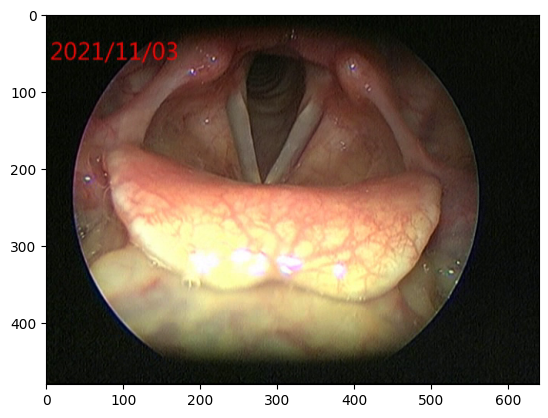

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/Data_At2/frame442.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

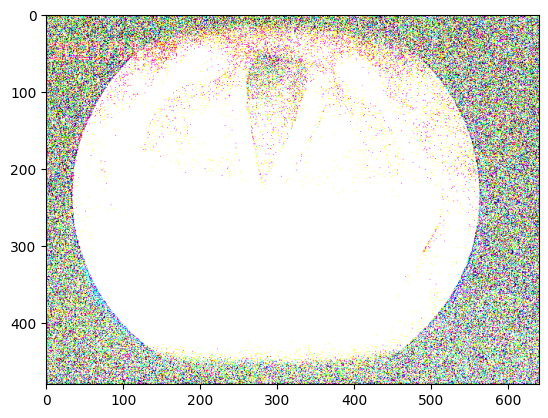

In [ ]:
row,col,ch= image.shape
mean = 0
sigma = 25
gauss = np.random.normal(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy = image + gauss
cv2.imwrite('noisy.png', noisy)
plt.imshow(noisy)


2. A l'aide de la librairie skimage, trouvez le module necessaire pour appliquer les filtrages suivants sur l'image des cordes vocales bruitée:

*   Filtre moyenneur
*   Filtre median
*   Filtre gaussien


Affichez dans la meme figure, l'image originale ainsi que les resultats des filtres précédement cités.
Interpretez l'effet de chaque filtre.


Gauusian filter

In [ ]:
print(np.max(noisy))

361.85067078447


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


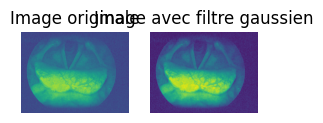

<ipython-input-15-479bc5a1da65>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, 3)


(-0.5, 639.5, 479.5, -0.5)

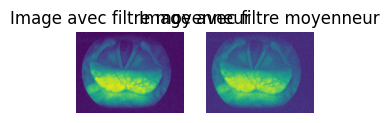

In [ ]:
import skimage
from skimage import filters,color,img_as_ubyte
from skimage import img_as_float
image = color.rgb2gray(noisy)
image0=image
gauss_filter=skimage.filters.gaussian(image, sigma=1)
median_filter=skimage.filters.median(image)
# Normaliser si les valeurs ne sont pas entre 0 et 1
if np.max(image) > 1.0:
    image = image / np.max(image)
mean_filter=skimage.filters.rank.mean(image, skimage.morphology.disk(3))
plt.subplot(1, 4, 1)
plt.imshow(image0)
plt.title('Image originale')
plt.axis('off')


plt.subplot(1, 4, 2)
plt.imshow(gauss_filter)
plt.title('Image avec filtre gaussien')
plt.axis('off')
plt.show()
plt.imshow(gauss_filter)

plt.subplot(1, 4, 3)
plt.imshow(mean_filter)
plt.title('Image avec filtre moyenneur')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(median_filter)
plt.title('Image avec filtre moyenneur')
plt.axis('off')




# **Exercice 2: seuillage**

L'objectif de cet exercice est de trouver le seuil optimal permettant de passer de l'image en niveaux de gris a une image binaire

En utilisant la librairie opencv lisez la version initiale de l'image 'frame442'

1) Trouver en affichant l'histogramme de l'image la(es) valeur(s) seuil(s) pour la binariser

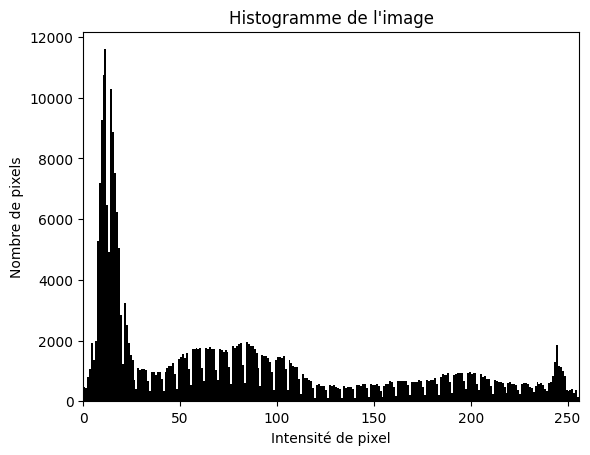

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Lire l'image en niveaux de gris
image = cv2.imread("/content/drive/MyDrive/Data_At2/frame442.png", cv2.IMREAD_GRAYSCALE)

# 2. Afficher l'histogramme de l'image
plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogramme de l\'image')
plt.xlabel('Intensité de pixel')
plt.ylabel('Nombre de pixels')
plt.xlim([0, 256])
plt.show()


2) En utilisant la librairie opencv, appliquez la technique de seuillage par seuil d'otsu (seuillage optimal)

In [ ]:
optimal_threshold, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Seuil optimal trouvé :", optimal_threshold)


Seuil optimal trouvé : 116.0


3) Comparez les valeurs de seuils retrouvées par les deux méthhodes.

# **Exercice 3 : Transformations morphologiques**

---



L'objectif de cet exercice est de manipuler les operateurs morphologiques permettant de realiser des pretraitemenst et de postraitements sur les images segmentées. En effet, ces operations sont appliquees sur des masques binaires avec le fond en noir et les objets sont en blanc.

1) En utilisant la librairie opencv, lisez et affichez l'image binaire 'seg1468.png', issue d'une segmentation automatique. Nous envisageons de supprimer les resgions outliers (regions détectées mais n'appartenant pas à la région d'intérêt qui est le glottis dans notre cas)

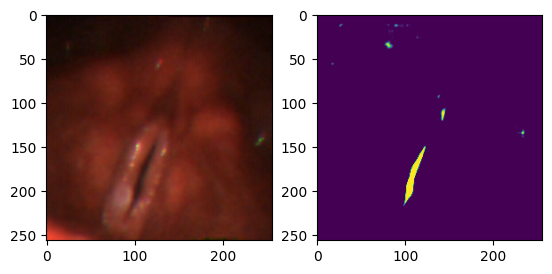

In [ ]:
img_col=cv2.imread("/content/drive/MyDrive/Data_At2/01468_rgb.png")
img_rgb = cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
img_aut=cv2.imread("/content/drive/MyDrive/Data_At2/seg1468.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 2)
plt.imshow(img_aut)

2) A l'aide de la librairie opencv, réalisez chacune des opérations morphologiques suivantes et visualisez le résultat obtenu :

*   Érosion
*   Dilatation

*   Ouverture
*   Fermeture

Quelle est l'operation qui a permis au mieux d'éliminer les régions outliers.


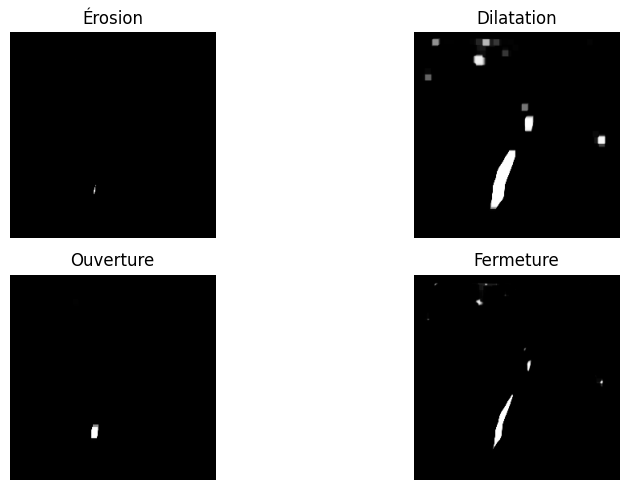

In [ ]:
def operations_morphologiques(image,kernel_size):
  kernel = np.ones((kernel_size, kernel_size), np.uint8)
  # Erosion
  eroded = cv2.erode(img_aut, kernel, iterations=1)
  # Dilatation
  dilated = cv2.dilate(img_aut, kernel, iterations=1)
  # Ouverture
  opened = cv2.morphologyEx(img_aut, cv2.MORPH_OPEN, kernel)
  # Fermeture
  closed = cv2.morphologyEx(img_aut, cv2.MORPH_CLOSE, kernel)
  # Visualiser les résultats
  plt.figure(figsize=(10, 5))
  plt.subplot(2, 2, 1)
  plt.imshow(eroded, cmap='gray')
  plt.title('Érosion')
  plt.axis('off')

  plt.subplot(2, 2, 2)
  plt.imshow(dilated, cmap='gray')
  plt.title('Dilatation')
  plt.axis('off')

  plt.subplot(2, 2, 3)
  plt.imshow(opened, cmap='gray')
  plt.title('Ouverture')
  plt.axis('off')

  plt.subplot(2, 2, 4)
  plt.imshow(closed, cmap='gray')
  plt.title('Fermeture')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

# Effet du taille du kernel

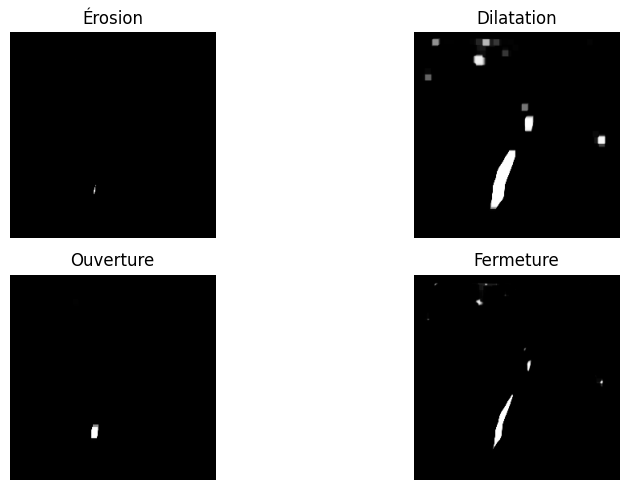

In [ ]:
operations_morphologiques(img_aut,7)

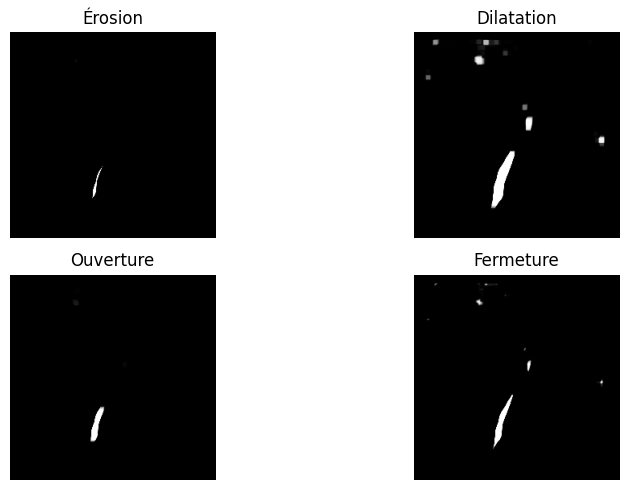

In [ ]:
operations_morphologiques(img_aut,5)

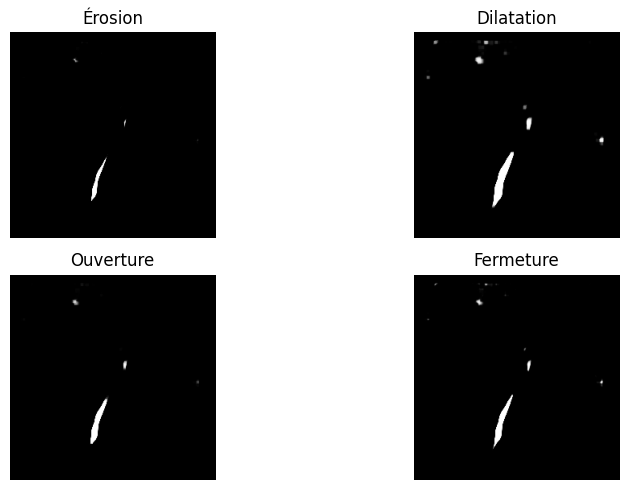

In [ ]:
operations_morphologiques(img_aut,3)

###Visuellement, on remarque que la taille du fenetre a un impact sur les opérateurs morphologiques: Pour l'érosion: une fenetre de petite taille supprime plus de pixels. Pour la dilatation , a mesure que la taille du fenetre augmente la taille des objets augmente aussi. Au niveau de l'ouverture on remarque que un petit noyau enlever le bruit de petite taille tout en préservant les structures plus grandes et les détails fins peuvent être conservés.

3) Utilisez les operateurs morphologiques necessaires ainsi que les operateurs arithmetiques (addition, soustraction, etc) pour detecter le contour de la region corresspondant au glottis.

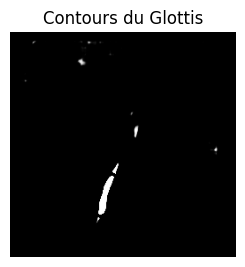

In [ ]:
_, binary_image = cv2.threshold(img_aut, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# 4. Opérations Morphologiques
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=2)
opened_image = cv2.morphologyEx(dilated_image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# 5. Détection des contours
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 6. Dessiner les contours sur une copie de l'image originale
contour_image = img_aut.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Couleur verte pour les contours
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours du Glottis")
plt.axis("off")

plt.show()

4) Affichez le contour du glottis sur l'image originale.

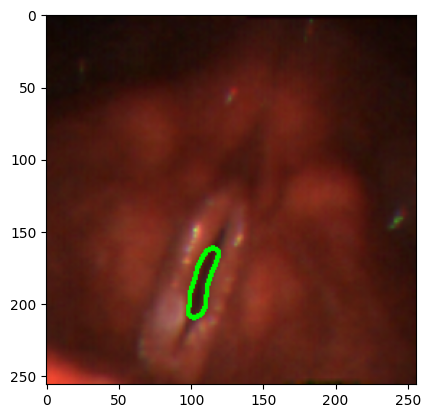

In [ ]:
cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 2)
plt.imshow(img_rgb)

# Exercice 4 : Extraction de contours

L'objectif de cet exercice consiste a detecter les contours des objets d'interet dans l'image des cordes vocales.


1) En utilisant la librarie opencv, appliquez les filtres de Sobel et de Laplace permettant de detecter les contours dans une image. Comparez les résultats otenus en affichant dans la même figure l'image originale et les résultats des deux filtres.

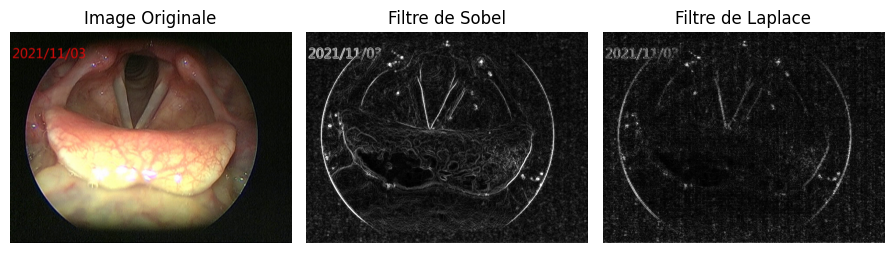

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image et la convertir en niveaux de gris
image = cv2.imread("/content/drive/MyDrive/Data_At2/frame442.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer le filtre de Sobel pour la détection des contours
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Détection des contours horizontaux
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Détection des contours verticaux
sobel_image = np.sqrt(sobel_x**2 + sobel_y**2)  # Combinaison des deux directions

# Appliquer le filtre de Laplace pour la détection des contours
laplacian_image = cv2.Laplacian(gray_image,cv2.CV_64F, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# Convertir les images filtrées en format 8 bits pour l'affichage
sobel_image = cv2.convertScaleAbs(sobel_image)
laplacian_image = cv2.convertScaleAbs(laplacian_image)

# Afficher les résultats
plt.figure(figsize=(12, 8))

# Afficher l'image originale
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image Originale")
plt.axis('off')

# Afficher l'image après le filtre de Sobel
plt.subplot(1, 4, 2)
plt.imshow(sobel_image, cmap='gray')
plt.title("Filtre de Sobel")
plt.axis('off')

# Afficher l'image après le filtre de Laplace
plt.subplot(1, 4, 3)
plt.imshow(laplacian_image, cmap='gray')
plt.title("Filtre de Laplace")
plt.axis('off')

plt.tight_layout()
plt.show()


[texte du lien](https://)2) Calculez et affichez le gradient morphologique sachant qu'il est defini par la différence entre une dilatation et une érosion de l'image

3) Question de reflexion : Supprimer les contours qui ne correspondent pas au contour du glottis.

# Exercice 5 : Segmentation par watershed

1) Utilisez le contour issue du gradient morphologique (marqueur) précedement déterminé et donner le résultat de segmentation par le watershed (méthode de segmentation conventionnelle)..

2) Determinez le résultat de segmentation en utilisant le contour ground truth (obtenu à partir de l'image segmentée automatiquement)  


3) Comparez en affichant les deux resultats de watershed dans la meme figure (contours avec deux couleurs différentes).